## __Business Understanding__

        - To Develop an NLP model to examine how travelers are communicating their positive and negative experiences on online platforms for staying in a specific hotel.
        - Find what are the relevant attributes that travelers are considering while selecting a hotel, that helps hotel managers understand what influence more in forming a positive review or improves hotel brand image.
        - Deploy the model on Streamlit/ Flask / Heroku 

        - Dataset Details 
                Review: text data consisting 20,000 reviews.
                Rating: Rating in range of 1 to 5, consisting 20,000 reviews.

## __Importing Required Libraries__

In [100]:
import warnings
warnings.filterwarnings('ignore')

# Data Understanding and Manipulation libs...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
! pip install plotly
import plotly.express as px

# Data Preparation libs...
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


# Model Building libs...
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier,  BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Model Evaluation libs...
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install wordcloud
! pip install nltk
! pip install -U spacy
! python -m spacy download en_core_web_md

import string
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
nlp = spacy.load('en_core_web_md')


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                              0.1/42.8 MB 1.7 MB/s eta 0:00:26
                                             0.1/42.8 MB 919.0 kB/s eta 0:00:47
                                             0.1/42.8 MB 919.0 kB/s eta 0:00:47
                                             0.1/42.8 MB 919.0 kB/s eta 0:00:47
                                 


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
stopwords = stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

## __Data Understanding__

        Importing Dataset

In [4]:
df = pd.read_csv('hotel_reviews.csv')
df

Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]

        Displaying first few rows


In [5]:
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

        Summary Statistics

In [6]:
df.describe()

Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000

        Checking Basic Informations

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


        Verifying the count if each element of Rating columns

In [8]:
df.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [9]:
df.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [10]:
df.Rating.value_counts(normalize=True)

5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: Rating, dtype: float64

        Verifying data Quality

                Checking if null values present in any column


In [11]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

        There is no missing values in our dataset

                Checking for number of duplicate rows

In [12]:
df.duplicated().sum()

0

        Checking for duplicate columns


In [13]:
df.T.duplicated()

Review    False
Rating    False
dtype: bool

        Checking datatype of each columns 


In [14]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [15]:
print(df.shape); print('Number of Rows: ',df.shape[0]); print('Number of columns: ',df.shape[1])

(20491, 2)
Number of Rows:  20491
Number of columns:  2


        Pie Chart to Visualize Rating Counts

Text(0.5, 1.0, 'Pie chart of Rating Counts')

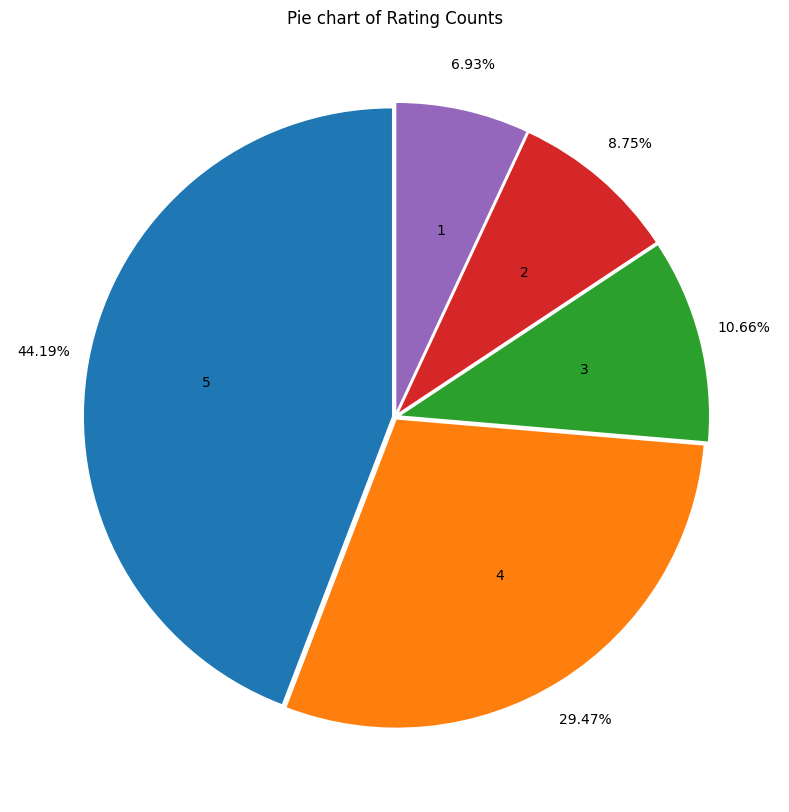

In [16]:
ratingCount = df.Rating.value_counts()
fig = plt.figure(figsize=(15,10))
plt.pie(ratingCount,labels=ratingCount.index,autopct='%1.2f%%', pctdistance=1.15, labeldistance=.6,startangle=90, explode = (0.01,0.01, 0.02, 0.02, 0.02))
plt.title('Pie chart of Rating Counts')

    Inferences:
        - 44.19% Rating given which is highest among all the Ratings is 5, followed by 29.47% to Rating 4, 10.66% to Rating 3, 8.75% to Rating 2, and 6.93% to Rating 1.
        - From above parameters we can say that Majority of the customers are satisfied with the experience provided.
        - This suggests that the the services they are providing is quite good in comparison to the volume of Lowest Ratings.
            

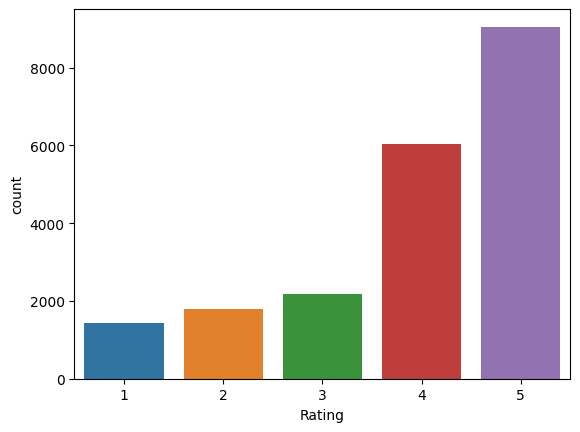

In [17]:
sns.countplot(x="Rating", data=df)
plt.show()

    Word Cloud of the Review Column

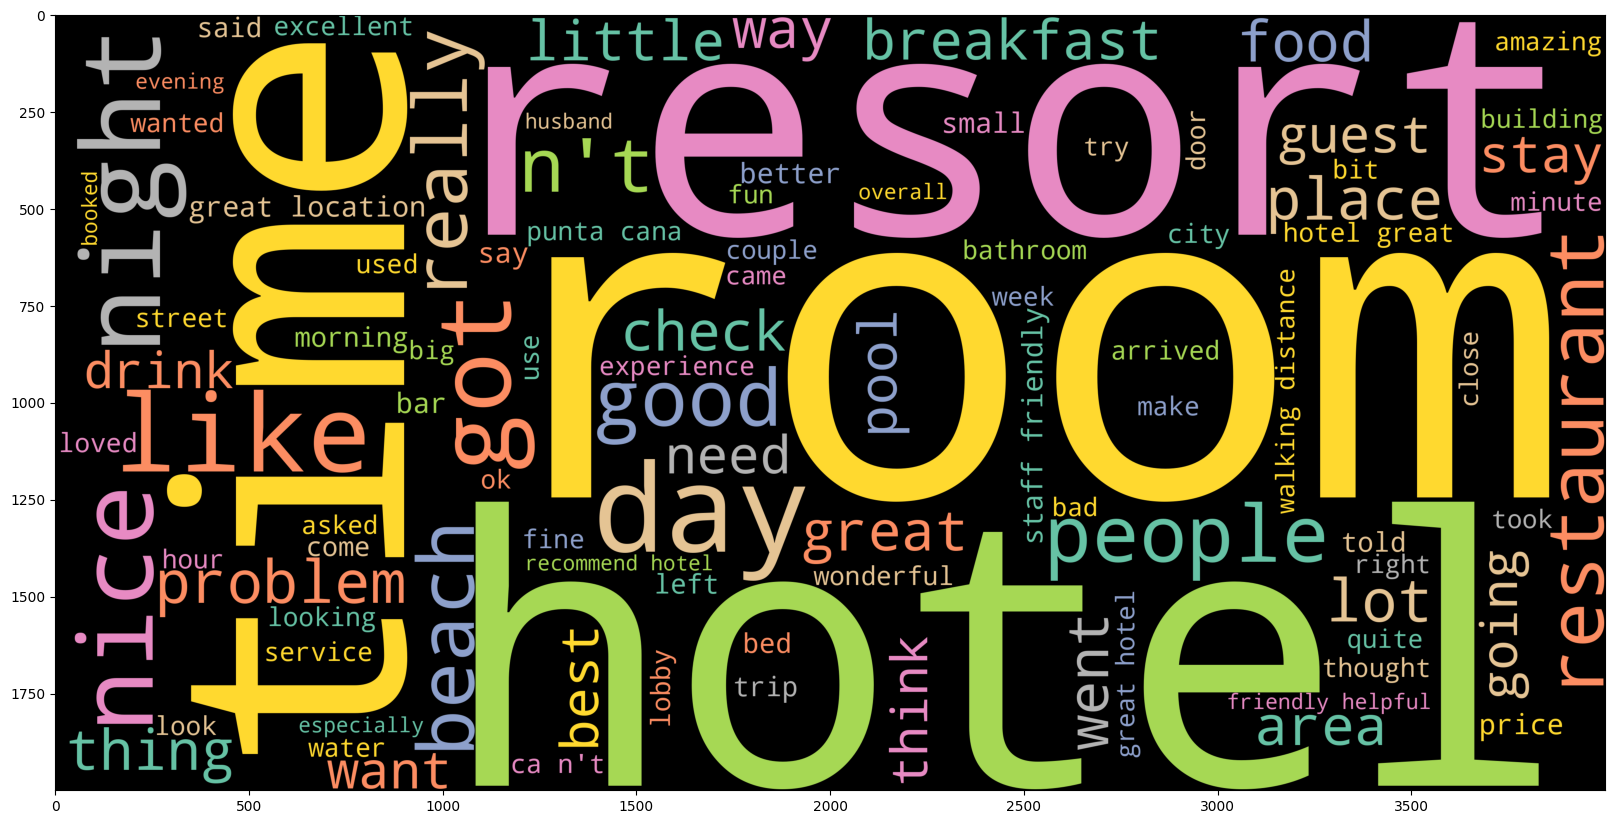

In [18]:
plt.figure(figsize=(20,12))
wordcloud = WordCloud(width=4000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(" ".join(df['Review']))
plt.imshow(wordcloud)

    Word Count and Review Length Count

In [13]:
df['wordCount'] = df.Review.apply(lambda x: len(str(x).split(' ')))
df['lengthCount'] = df.Review.apply(len)
df

Review  Rating  wordCount  \
0      nice hotel expensive parking got good deal sta...       4         89   
1      ok nothing special charge diamond member hilto...       2        252   
2      nice rooms not 4* experience hotel monaco seat...       3        219   
3      unique, great stay, wonderful time hotel monac...       5         91   
4      great stay great stay, went seahawk game aweso...       5        193   
...                                                  ...     ...        ...   
20486  best kept secret 3rd time staying charm, not 5...       5        111   
20487  great location price view hotel great quick pl...       4         41   
20488  ok just looks nice modern outside, desk staff ...       2         65   
20489  hotel theft ruined vacation hotel opened sept ...       1        783   
20490  people talking, ca n't believe excellent ratin...       2         92   

       lengthCount  
0              593  
1             1689  
2             1427  
3              600  
4             1281  
...            ...  
20486          733  
20487          306  
20488          443  
20489         5557  
20490          620  

[20491 rows x 4 columns]

    Descriptive Stats for Numeric Columns

In [17]:
df.describe()

Rating     wordCount   lengthCount
count  20491.000000  20491.000000  20491.000000
mean       3.952223    106.375043    724.896833
std        1.233030    100.655267    689.101024
min        1.000000      9.000000     44.000000
25%        3.000000     50.000000    339.000000
50%        4.000000     79.000000    537.000000
75%        5.000000    126.000000    859.000000
max        5.000000   1933.000000  13501.000000

    Plotting bar graph by creating pivot table to check Average number of words in each rating  

In [18]:
pvt = pd.pivot_table(df,values='wordCount',index='Rating',aggfunc='mean')
fig = px.bar(pvt,x=pvt.index,y='wordCount',title='Rating Vs Average Number of Words',width=800,height=600,color='wordCount',color_continuous_scale='balance')
fig.show()

In [19]:
pvt

wordCount
Rating            
1       114.365236
2       128.598438
3       116.705586
4       109.771154
5        95.962889

    Histogram plots for lengthCount and wordCount

In [23]:
fig = px.histogram(df,x='lengthCount',width=1500,height=700)
fig.update_layout(bargap=0.2)
fig.show()

In [24]:
fig = px.histogram(df,x='wordCount',width=1500,height=700)
fig.update_layout(bargap=0.2)
fig.show()

    checking the lengthy Reviews

In [14]:
df_sort = df.sort_values(by='lengthCount',ascending=False)
df_sort.head(10)

Review  Rating  wordCount  \
7072   honest review visit 5/21-5/28 let begin saying...       3       1933   
7049   false start good vacation secrets__Ç, false st...       5       1757   
13003  awesome vacation sirenis punta cana arrival fl...       5       1641   
17777  fantastic return trip, firstly apology length ...       5       1610   
17800  wanted know afraid ask just 10 short days ago ...       4       1459   
6823   sunscape spectacular, august 2002 heard read r...       5       1385   
17953  great value great resort, family party hubbie ...       4       1437   
6821   relaxing great time husband stayed sunscape ap...       4       1460   
18911  vacation make husband stayed ocean blue septem...       3       1329   
2962   bavaro princess- incredible environment, overa...       4       1347   

       lengthCount  
7072         13501  
7049         12738  
13003        11014  
17777        10420  
17800        10062  
6823          9748  
17953         9712  
6821          9351  
18911         9339  
2962          8953

In [21]:
df_sort.Review.iloc[0]

"honest review visit 5/21-5/28 let begin saying heard secrets couple work went resort year returned raving experiences, all-inclusive regular cruise traveler past 4 years decided based word-of-mouth secrets place try.i read posts site daily, review written resort scoured eyes, reviews gotten good suspected staff secrets writing, fact person posted review claimed saw staff members reading posting forum, ca n't say stay excellence club saw type activity going wo n't past hotel ratings high posting positive reviews.in case read totally honest review secrets felt all-inclusive experience, end review include link photo page think enjoy.i booked trip judy maria travel internet, no travel agent travel site pop did search booking resort, went site saw photos judy maria resort chumming general manager, felt dealing travel agents knew resort took chance booking, great gamble, maria gave great price suggested perfect room location took travel worries hands, admit nervous n't room wanted helicopte

## __Data Preparation__

    Removing lengthy Reviews  whose lengths are greater than 3500, considering them as a extreme cases.

In [22]:
len(df)

20491

In [15]:
df = df[df['lengthCount']<=2500]
len(df)

19980

In [16]:
df = df.reset_index(drop=True)             # drop=True to drop the old index column
df.head()

Review  Rating  wordCount  \
0  nice hotel expensive parking got good deal sta...       4         89   
1  ok nothing special charge diamond member hilto...       2        252   
2  nice rooms not 4* experience hotel monaco seat...       3        219   
3  unique, great stay, wonderful time hotel monac...       5         91   
4  great stay great stay, went seahawk game aweso...       5        193   

   lengthCount  
0          593  
1         1689  
2         1427  
3          600  
4         1281

    Data Cleaning 

In [37]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [18]:
def cleanData(reviews):
    cleaning = []
    for review in reviews:
        lowerCase = review.lower()                     #Lowercasing the text
        lowerCase = lowerCase.replace(" n't", " not")    # Changing n't to not for ex can't => can not
        lowerCase = lowerCase.replace("."," . ")
        lowerCase = ' '.join(word.strip(string.punctuation) for word in lowerCase.split()) # Splitting into words
        words = lowerCase.split()
        words = [word for word in words if word.isalpha()]   # Number Removal
        split = [apposV2[word] if word in apposV2 else word for word in words]
        split = [appos[word] if word in appos else word for word in words]
        split = [word for word in split if word not in stopwords] # Stopwords Removal
        reformed = " ".join(split) #Joining words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc])
        cleaning.append(reformed)
    cleanedData = pd.DataFrame()
    cleanedData['Cleaned_Reviews'] = cleaning
    return cleanedData['Cleaned_Reviews']
cleanedReviews = cleanData(df['Review'])
cleanedReviews

0        nice hotel expensive parking get good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay go seahawk game awesome ...
                               ...                        
19975    impressed unfriendly staff check ask high floo...
19976    well keep secret time stay charm can beat time...
19977    great location price view hotel great quick pl...
19978    ok look nice modern outside desk staff particu...
19979    people talk can believe excellent rating hotel...
Name: Cleaned_Reviews, Length: 19980, dtype: object

In [19]:
df_cleaned = pd.concat([df,cleanedReviews],axis=1)
df_cleaned

Review  Rating  wordCount  \
0      nice hotel expensive parking got good deal sta...       4         89   
1      ok nothing special charge diamond member hilto...       2        252   
2      nice rooms not 4* experience hotel monaco seat...       3        219   
3      unique, great stay, wonderful time hotel monac...       5         91   
4      great stay great stay, went seahawk game aweso...       5        193   
...                                                  ...     ...        ...   
19975  not impressed unfriendly staff checked asked h...       2         89   
19976  best kept secret 3rd time staying charm, not 5...       5        111   
19977  great location price view hotel great quick pl...       4         41   
19978  ok just looks nice modern outside, desk staff ...       2         65   
19979  people talking, ca n't believe excellent ratin...       2         92   

       lengthCount                                    Cleaned_Reviews  
0              593  nice hotel expensive parking get good deal sta...  
1             1689  ok nothing special charge diamond member hilto...  
2             1427  nice room experience hotel monaco seattle good...  
3              600  unique great stay wonderful time hotel monaco ...  
4             1281  great stay great stay go seahawk game awesome ...  
...            ...                                                ...  
19975          616  impressed unfriendly staff check ask high floo...  
19976          733  well keep secret time stay charm can beat time...  
19977          306  great location price view hotel great quick pl...  
19978          443  ok look nice modern outside desk staff particu...  
19979          620  people talk can believe excellent rating hotel...  

[19980 rows x 5 columns]

In [20]:
df = df_cleaned.copy()
df.head()

Review  Rating  wordCount  \
0  nice hotel expensive parking got good deal sta...       4         89   
1  ok nothing special charge diamond member hilto...       2        252   
2  nice rooms not 4* experience hotel monaco seat...       3        219   
3  unique, great stay, wonderful time hotel monac...       5         91   
4  great stay great stay, went seahawk game aweso...       5        193   

   lengthCount                                    Cleaned_Reviews  
0          593  nice hotel expensive parking get good deal sta...  
1         1689  ok nothing special charge diamond member hilto...  
2         1427  nice room experience hotel monaco seattle good...  
3          600  unique great stay wonderful time hotel monaco ...  
4         1281  great stay great stay go seahawk game awesome ...

In [30]:
df['Cleaned_Reviews'].iloc[0]

'nice hotel expensive parking get good deal stay hotel anniversary arrive late evening take advice previous review valet parking check quick easy little disappointed view room room clean nice size bed comfortable wake stiff neck high pillow soundproof like hear music room night morning loud bang door open closing hear people talk hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch take advantage stay long location great walking distance shop overall nice experience pay parking night'

    WordCloud
    
            - It is a visual representation, grouping of words that are displayed in various sizes.
            - The larger and bolder the term, the more frequently appears in a document and the more important is is.

                                                WordCloud of Cleaned_Reviews column

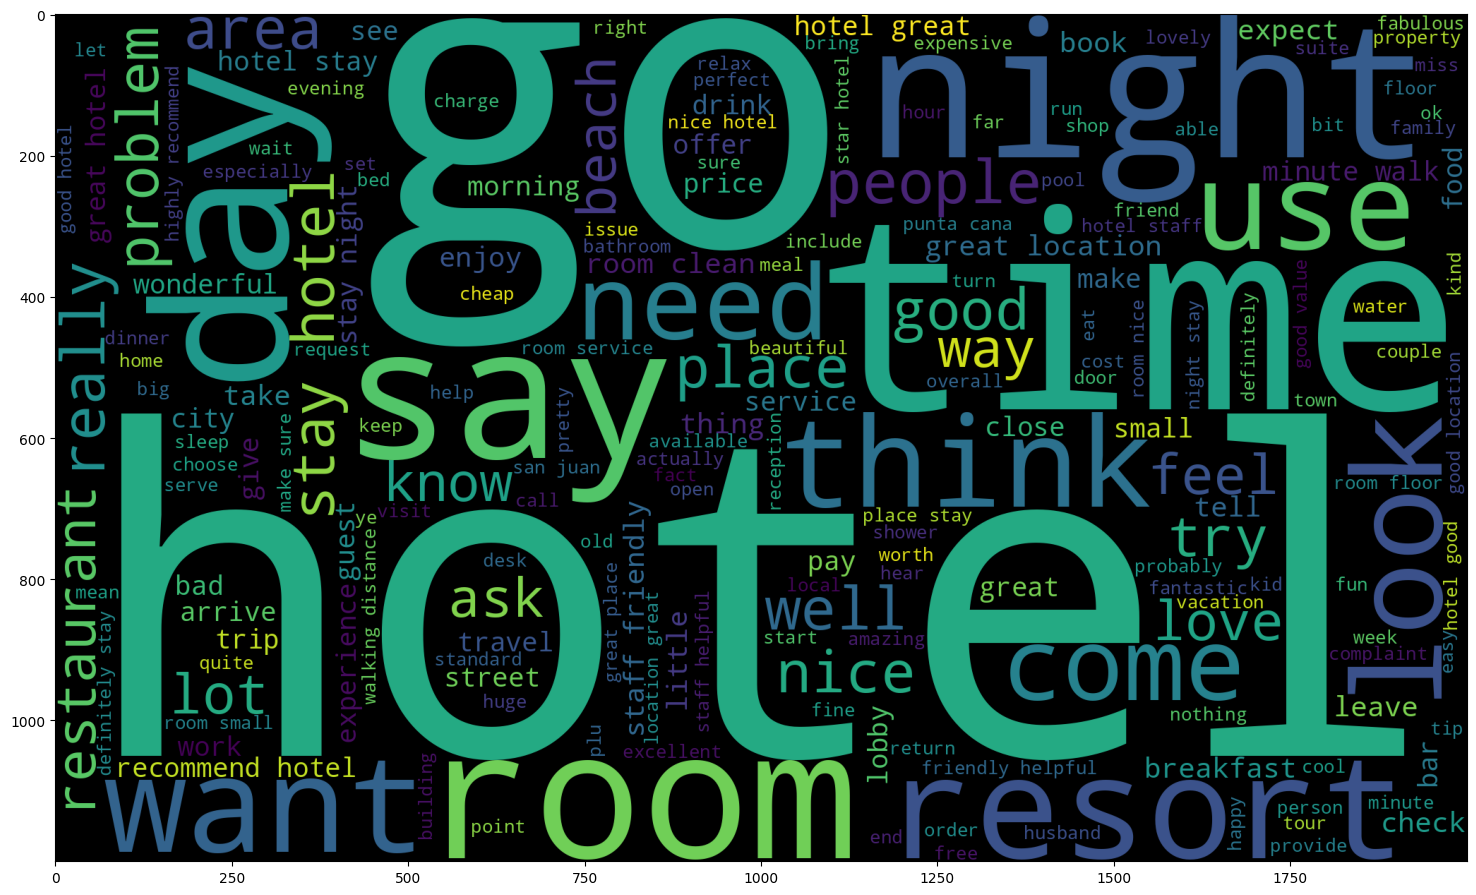

In [36]:
plt.figure(figsize=(25,11))
wordcloud = WordCloud(background_color= 'black', width = 2000, height = 1200).generate(" ".join(df['Cleaned_Reviews']))
plt.imshow(wordcloud)
plt.show()

                                                WordCloud for Positive Reviews

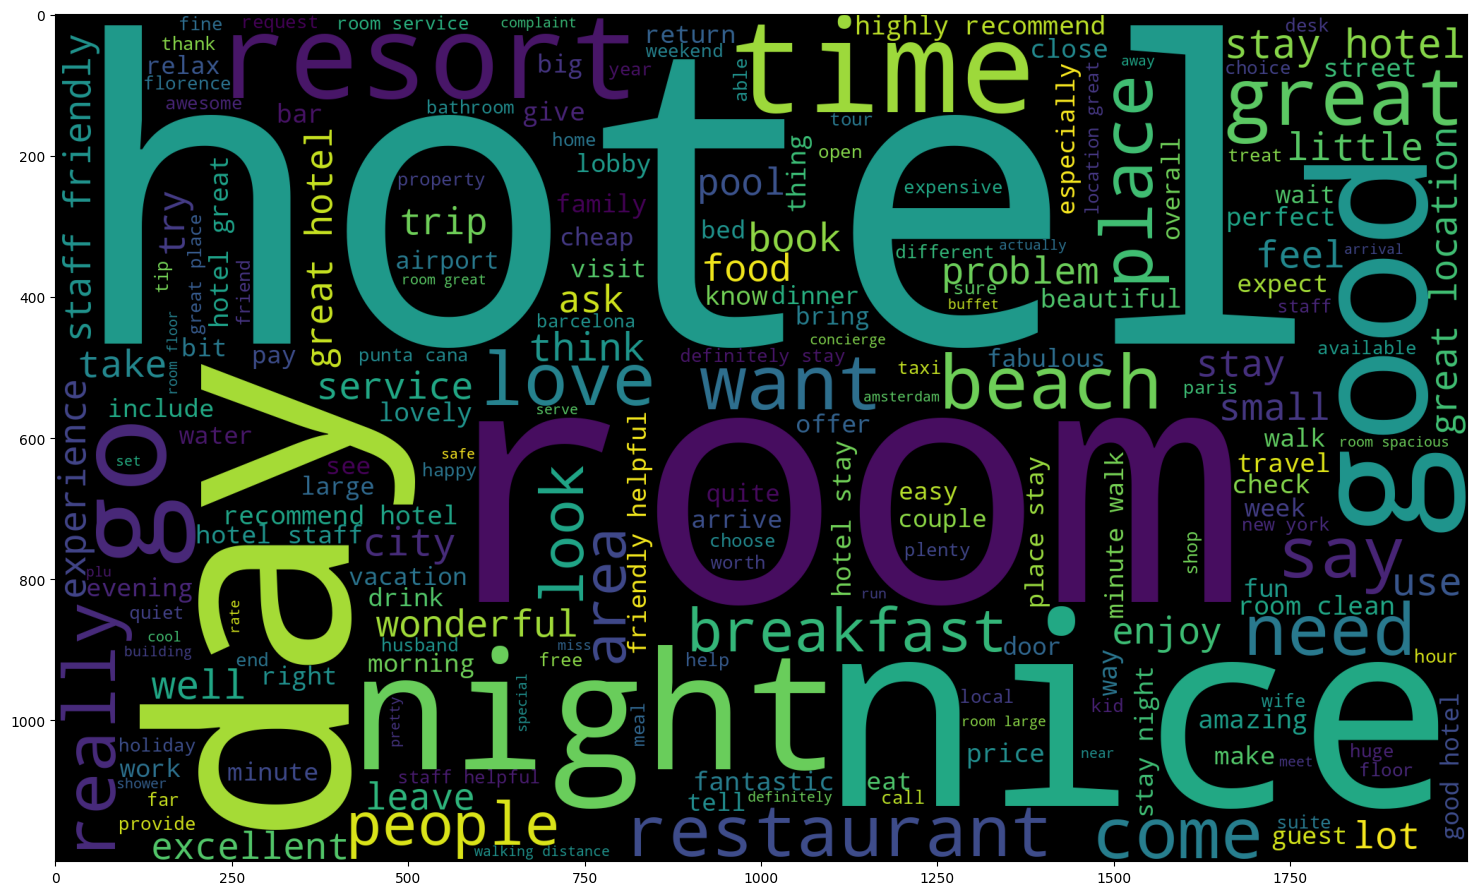

In [31]:
# Considering Reviews of Rating = 5 as Positive Reviews
pos_rev = df[df["Rating"].isin([5])]

plt.figure(figsize=(25,11))
wordcloud = WordCloud(background_color= 'black', width = 2000, height = 1200).generate(" ".join(pos_rev['Cleaned_Reviews']))
plt.imshow(wordcloud)
plt.show()

                                                WordCloud for Negative Reviews

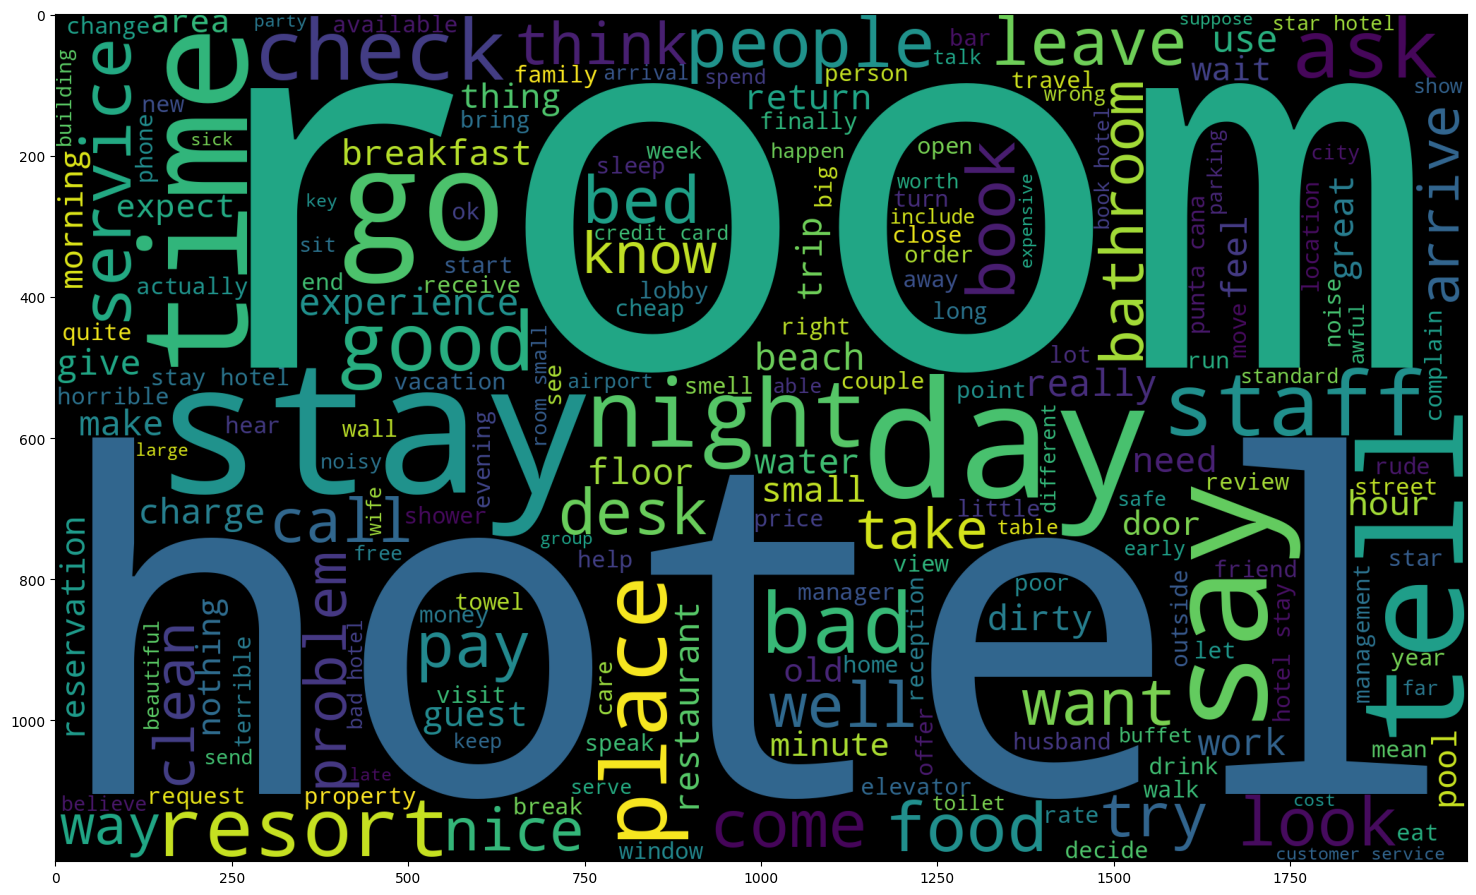

In [33]:
# Considering Reviews of Rating = 1 as Negative Reviews
neg_rev = df.loc[df["Rating"].isin([1])]

plt.figure(figsize=(25,11))
wordcloud = WordCloud(background_color= 'black', width = 2000, height = 1200).generate(" ".join(neg_rev['Cleaned_Reviews']))
plt.imshow(wordcloud)
plt.show()

## __Sentiment Analysis__

    Sentiment TextBlob

In [22]:
!pip install textblob


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Checking sentiment of each tweet using TextBlob
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'Text' column
df['Sentiment_TextBlob'] = df['Cleaned_Reviews'].apply(get_sentiment)


In [24]:
# Display the results
df[['Cleaned_Reviews', 'Sentiment_TextBlob']].head(50)

Cleaned_Reviews Sentiment_TextBlob
0   nice hotel expensive parking get good deal sta...           Positive
1   ok nothing special charge diamond member hilto...           Positive
2   nice room experience hotel monaco seattle good...           Positive
3   unique great stay wonderful time hotel monaco ...           Positive
4   great stay great stay go seahawk game awesome ...           Positive
5   love monaco staff husband stay hotel crazy wee...           Positive
6   cozy stay rainy city husband spend night monac...           Positive
7   excellent staff housekeeping quality hotel cho...           Positive
8   hotel stay hotel monaco cruise room generous d...           Positive
9   excellent stay hotel monaco past delight recep...           Positive
10  poor value stay monaco seattle july nice hotel...           Positive
11  nice value seattle stay night late look compar...           Positive
12  nice hotel good location hotel kimpton design ...           Positive
13  nice hotel nice staff hotel lovely staff quite...           Positive
14  great hotel night quick business trip love lit...           Positive
15  horrible customer service hotel stay february ...           Positive
16  disappointed say anticipate stay hotel monaco ...           Positive
17  fantastic stay monaco seattle hotel monaco hol...           Positive
18  good choice hotel recommend sister great locat...           Positive
19  hmmmmm say really high hope hotel monaco choos...           Positive
20  service service service spend week labor day b...           Positive
21  excellent stay delightful surprise stay monaco...           Positive
22  good value downtown hotel monaco seattle great...           Positive
23  hotel monaco great location service hotel mona...           Positive
24  great location need internally upgrade advanta...           Positive
25  mind noise place great read review noise use h...           Positive
26  love stay warwick overnight getway enjoy chris...           Positive
27  meet expectation centrally locate hotel block ...           Positive
28  nice hotel husband stay warwick year ago like ...           Positive
29  good hotel large hotel newly decorate room goo...           Positive
30  good choice seattle stay night business book c...           Positive
31  great location expensive parking warwick heart...           Positive
32  noise standard arrange stay travel agency unfo...           Positive
33  good location poor cleanliness warwick hotel g...           Positive
34  good place spend big buck warwick plenty comfo...           Positive
35  nice hotel trip seattle want stay downtown goo...           Positive
36  great value seattle spouse stay warwick seattl...           Positive
37  gem hotel absolute gem small great service roo...           Positive
38  pretty good value visit seattle frequently day...           Positive
39  average nice stay hotel amazing location great...           Positive
40  bad choice book hotel hot wire call immediatel...           Positive
41  good value hotel stay warwick time past year s...           Positive
42  warwick bad good review warwick shocks staff q...           Negative
43  great service warwick recently spend day chris...           Positive
44  austin power decor familiar hotel seattlewhere...           Negative
45  great location stay long need place stay seatt...           Positive
46  pay read review book know get mind surprised f...           Positive
47  bad location unmatchable price range simple sl...           Positive
48  remarkable hotel need day book inn base tripad...           Positive
49  great location friendly staff stay hotel easte...           Positive

In [25]:
df

Review  Rating  wordCount  \
0      nice hotel expensive parking got good deal sta...       4         89   
1      ok nothing special charge diamond member hilto...       2        252   
2      nice rooms not 4* experience hotel monaco seat...       3        219   
3      unique, great stay, wonderful time hotel monac...       5         91   
4      great stay great stay, went seahawk game aweso...       5        193   
...                                                  ...     ...        ...   
19975  not impressed unfriendly staff checked asked h...       2         89   
19976  best kept secret 3rd time staying charm, not 5...       5        111   
19977  great location price view hotel great quick pl...       4         41   
19978  ok just looks nice modern outside, desk staff ...       2         65   
19979  people talking, ca n't believe excellent ratin...       2         92   

       lengthCount                                    Cleaned_Reviews  \
0              593  nice hotel expensive parking get good deal sta...   
1             1689  ok nothing special charge diamond member hilto...   
2             1427  nice room experience hotel monaco seattle good...   
3              600  unique great stay wonderful time hotel monaco ...   
4             1281  great stay great stay go seahawk game awesome ...   
...            ...                                                ...   
19975          616  impressed unfriendly staff check ask high floo...   
19976          733  well keep secret time stay charm can beat time...   
19977          306  great location price view hotel great quick pl...   
19978          443  ok look nice modern outside desk staff particu...   
19979          620  people talk can believe excellent rating hotel...   

      Sentiment_TextBlob  
0               Positive  
1               Positive  
2               Positive  
3               Positive  
4               Positive  
...                  ...  
19975           Positive  
19976           Positive  
19977           Positive  
19978           Positive  
19979           Positive  

[19980 rows x 6 columns]

        Sentiment Vader

In [26]:
import nltk
nltk.download('vader_lexicon')

# Checking sentiment of each tweet using TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Function to get sentiment polarity using SentimentIntensityAnalyzer in Vader
def get_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sent_score = sid.polarity_scores(text)
    if sent_score['compound'] >= 0.05:
        return 'Positive'
    elif sent_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Text' column
df['Sentiment_Vader'] = df['Cleaned_Reviews'].apply(get_sentiment)

In [28]:
# Display the results
sntmnt_tBlobVader = df[['Cleaned_Reviews', 'Sentiment_TextBlob','Sentiment_Vader']]
sntmnt_tBlobVader

Cleaned_Reviews Sentiment_TextBlob  \
0      nice hotel expensive parking get good deal sta...           Positive   
1      ok nothing special charge diamond member hilto...           Positive   
2      nice room experience hotel monaco seattle good...           Positive   
3      unique great stay wonderful time hotel monaco ...           Positive   
4      great stay great stay go seahawk game awesome ...           Positive   
...                                                  ...                ...   
19975  impressed unfriendly staff check ask high floo...           Positive   
19976  well keep secret time stay charm can beat time...           Positive   
19977  great location price view hotel great quick pl...           Positive   
19978  ok look nice modern outside desk staff particu...           Positive   
19979  people talk can believe excellent rating hotel...           Positive   

      Sentiment_Vader  
0            Positive  
1            Positive  
2            Positive  
3            Positive  
4            Positive  
...               ...  
19975        Positive  
19976        Positive  
19977        Positive  
19978        Positive  
19979        Positive  

[19980 rows x 3 columns]

In [29]:
sntmnt_tBlobVader[sntmnt_tBlobVader['Sentiment_TextBlob']!=sntmnt_tBlobVader['Sentiment_Vader']]

Cleaned_Reviews Sentiment_TextBlob  \
97     terrible hotel approximately week ago april re...           Negative   
101    dump stayed weekend expect charming property b...           Negative   
118    luxury luxury stay suite else dime suite king ...           Negative   
155    recommend stay staff routinely indifferent poi...           Negative   
160    cramp noisy overrated husband stay hotel horri...           Negative   
...                                                  ...                ...   
19839  dirt hotel filtiest hotel stay life get lobby ...           Positive   
19844  tthe bad hotel experience read bad review desp...           Negative   
19889  good location good hotel stay day inn forbidde...           Positive   
19896  location location location stay deluxe room ma...           Positive   
19969  lack customer service skill overprice place on...           Negative   

      Sentiment_Vader  
97           Positive  
101          Positive  
118          Positive  
155          Positive  
160           Neutral  
...               ...  
19839        Negative  
19844        Positive  
19889        Negative  
19896        Negative  
19969        Positive  

[788 rows x 3 columns]

In [30]:
len(sntmnt_tBlobVader[sntmnt_tBlobVader['Sentiment_TextBlob']!=sntmnt_tBlobVader['Sentiment_Vader']])

788

In [31]:
df[df['Sentiment_TextBlob']!=df['Sentiment_Vader']].head(10)

Review  Rating  wordCount  \
97   terrible hotel approximately 2 weeks ago april...       1         84   
101  dump stayed weekend expected charming 1929 pro...       1         92   
118  luxury luxury having stayed suite elses dime, ...       4         28   
155  not recommend staying, staff routinely indiffe...       2         37   
160  cramped noisy overrated husband just stayed ho...       1         51   
178  yuck, stayed hotel nights earlier month, staye...       2        111   
190  checked early wo n't stay room dirty checked f...       2         42   
195  horrible customer service worst hilton possibl...       1        217   
196  agree worst hilton, absolute worst hilton stay...       1        191   
210  avoid costs place nightmare, understaffed mess...       1         44   

     lengthCount                                    Cleaned_Reviews  \
97           597  terrible hotel approximately week ago april re...   
101          628  dump stayed weekend expect charming property b...   
118          157  luxury luxury stay suite else dime suite king ...   
155          288  recommend stay staff routinely indifferent poi...   
160          353  cramp noisy overrated husband stay hotel horri...   
178          769  yuck stay hotel night early month stay number ...   
190          250  check early will stay room dirty check food su...   
195         1614  horrible customer service bad hilton possibly ...   
196         1316  agree bad hilton absolute bad hilton stay gold...   
210          305  avoid cost place nightmare understaffe messy a...   

    Sentiment_TextBlob Sentiment_Vader  
97            Negative        Positive  
101           Negative        Positive  
118           Negative        Positive  
155           Negative        Positive  
160           Negative         Neutral  
178           Negative        Positive  
190           Negative         Neutral  
195           Positive        Negative  
196           Negative        Positive  
210           Positive        Negative

In [32]:
df['TargetSentimentTextBlob'] = df['Sentiment_TextBlob'].map({'Neutral':0, 'Positive':1, 'Negative':2})
df['TargetSentimentVader'] = df['Sentiment_Vader'].map({'Neutral':0, 'Positive':1, 'Negative':2})
df

Review  Rating  wordCount  \
0      nice hotel expensive parking got good deal sta...       4         89   
1      ok nothing special charge diamond member hilto...       2        252   
2      nice rooms not 4* experience hotel monaco seat...       3        219   
3      unique, great stay, wonderful time hotel monac...       5         91   
4      great stay great stay, went seahawk game aweso...       5        193   
...                                                  ...     ...        ...   
19975  not impressed unfriendly staff checked asked h...       2         89   
19976  best kept secret 3rd time staying charm, not 5...       5        111   
19977  great location price view hotel great quick pl...       4         41   
19978  ok just looks nice modern outside, desk staff ...       2         65   
19979  people talking, ca n't believe excellent ratin...       2         92   

       lengthCount                                    Cleaned_Reviews  \
0              593  nice hotel expensive parking get good deal sta...   
1             1689  ok nothing special charge diamond member hilto...   
2             1427  nice room experience hotel monaco seattle good...   
3              600  unique great stay wonderful time hotel monaco ...   
4             1281  great stay great stay go seahawk game awesome ...   
...            ...                                                ...   
19975          616  impressed unfriendly staff check ask high floo...   
19976          733  well keep secret time stay charm can beat time...   
19977          306  great location price view hotel great quick pl...   
19978          443  ok look nice modern outside desk staff particu...   
19979          620  people talk can believe excellent rating hotel...   

      Sentiment_TextBlob Sentiment_Vader  TargetSentimentTextBlob  \
0               Positive        Positive                        1   
1               Positive        Positive                        1   
2               Positive        Positive                        1   
3               Positive        Positive                        1   
4               Positive        Positive                        1   
...                  ...             ...                      ...   
19975           Positive        Positive                        1   
19976           Positive        Positive                        1   
19977           Positive        Positive                        1   
19978           Positive        Positive                        1   
19979           Positive        Positive                        1   

       TargetSentimentVader  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
19975                     1  
19976                     1  
19977                     1  
19978                     1  
19979                     1  

[19980 rows x 9 columns]

In [34]:
df

Review  Rating  wordCount  \
0      nice hotel expensive parking got good deal sta...       4         89   
1      ok nothing special charge diamond member hilto...       2        252   
2      nice rooms not 4* experience hotel monaco seat...       3        219   
3      unique, great stay, wonderful time hotel monac...       5         91   
4      great stay great stay, went seahawk game aweso...       5        193   
...                                                  ...     ...        ...   
19975  not impressed unfriendly staff checked asked h...       2         89   
19976  best kept secret 3rd time staying charm, not 5...       5        111   
19977  great location price view hotel great quick pl...       4         41   
19978  ok just looks nice modern outside, desk staff ...       2         65   
19979  people talking, ca n't believe excellent ratin...       2         92   

       lengthCount                                    Cleaned_Reviews  \
0              593  nice hotel expensive parking get good deal sta...   
1             1689  ok nothing special charge diamond member hilto...   
2             1427  nice room experience hotel monaco seattle good...   
3              600  unique great stay wonderful time hotel monaco ...   
4             1281  great stay great stay go seahawk game awesome ...   
...            ...                                                ...   
19975          616  impressed unfriendly staff check ask high floo...   
19976          733  well keep secret time stay charm can beat time...   
19977          306  great location price view hotel great quick pl...   
19978          443  ok look nice modern outside desk staff particu...   
19979          620  people talk can believe excellent rating hotel...   

      Sentiment_TextBlob Sentiment_Vader  TargetSentimentTextBlob  \
0               Positive        Positive                        1   
1               Positive        Positive                        1   
2               Positive        Positive                        1   
3               Positive        Positive                        1   
4               Positive        Positive                        1   
...                  ...             ...                      ...   
19975           Positive        Positive                        1   
19976           Positive        Positive                        1   
19977           Positive        Positive                        1   
19978           Positive        Positive                        1   
19979           Positive        Positive                        1   

       TargetSentimentVader  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
19975                     1  
19976                     1  
19977                     1  
19978                     1  
19979                     1  

[19980 rows x 9 columns]

## __Model Building and Evaluation__

###    Review Classification

####    Using TextBlob lexicons

    CountVectorizer()
                    Train and Test set separation

In [87]:
# Hotel Rating Classification using Naive Bayes classifier
X = df['Cleaned_Reviews']
y = df['TargetSentimentTextBlob']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [88]:
df['TargetSentimentTextBlob'].value_counts()

1    18825
2     1138
0       17
Name: TargetSentimentTextBlob, dtype: int64

    Model Building

In [93]:
models = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000, multi_class='multinomial')),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Bagging Classifier', BaggingClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('MLP Classifier', MLPClassifier()),
]

    Model Evaluation

In [94]:
results = []
for model_name, model in models:
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    accuracy_sc = accuracy_score(y_test, y_pred)
    
    # Specify the positive label based on your actual class labels
    precision_sc = precision_score(y_test, y_pred, average='weighted')
    recall_sc = recall_score(y_test, y_pred, average='weighted')
    f1_sc = f1_score(y_test, y_pred, average='weighted')
    
    results.append((model_name, accuracy_sc, precision_sc, recall_sc, f1_sc))
    print(model_name)
    print('\n')

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])
print('Model Performance: ')
results_df

Multinomial Naive Bayes


Support Vector Machine


Random Forest Classifier


Logistic Regression


Gradient Boosting Classifier


Bagging Classifier


AdaBoost Classifier


MLP Classifier


Model Performance: 


Model  Accuracy Score  Precision Score  \
0       Multinomial Naive Bayes        0.951451         0.943517   
1        Support Vector Machine        0.958709         0.957537   
2      Random Forest Classifier        0.941942         0.945073   
3           Logistic Regression        0.973223         0.971633   
4  Gradient Boosting Classifier        0.956957         0.952517   
5            Bagging Classifier        0.948699         0.939845   
6           AdaBoost Classifier        0.939439         0.931859   
7                MLP Classifier        0.967968         0.965435   

   Recall Score  F1-Score  
0      0.951451  0.942381  
1      0.958709  0.949713  
2      0.941942  0.916708  
3      0.973223  0.972107  
4      0.956957  0.951257  
5      0.948699  0.941351  
6      0.939439  0.934945  
7      0.967968  0.965943

In [95]:
# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.9679679679679679
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      0.99      0.98      3751
           2       0.81      0.63      0.71       244

    accuracy                           0.97      3996
   macro avg       0.60      0.54      0.56      3996
weighted avg       0.97      0.97      0.97      3996



####    Using Vader lexicons

#####    CountVectorizer()

In [97]:
# Hotel Rating Classification using Naive Bayes classifier
X = df['Cleaned_Reviews']
y = df['TargetSentimentVader']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


    Model Building

In [99]:
models = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest Classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('Bagging Classifier', BaggingClassifier(n_estimators=100, random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)),
    ('MLP Classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, alpha=0.0001, solver='adam', random_state=42)),
]

    Model Evaluation

In [100]:
results = []
for model_name, model in models:
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    accuracy_sc = accuracy_score(y_test, y_pred)
    
    # Specifying weighted average
    precision_sc = precision_score(y_test, y_pred, average='weighted')
    recall_sc = recall_score(y_test, y_pred, average='weighted')
    f1_sc = f1_score(y_test, y_pred, average='weighted')
    
    results.append((model_name, accuracy_sc, precision_sc, recall_sc, f1_sc))
    print(model_name)
    print('\n')

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])
print('Model Performance: ')
results_df

Multinomial Naive Bayes


Support Vector Machine


Random Forest Classifier


Logistic Regression


Gradient Boosting Classifier


Bagging Classifier


AdaBoost Classifier


MLP Classifier


Model Performance: 


Model  Accuracy Score  Precision Score  \
0       Multinomial Naive Bayes        0.952703         0.943739   
1        Support Vector Machine        0.957708         0.950827   
2      Random Forest Classifier        0.945445         0.893867   
3           Logistic Regression        0.967467         0.963180   
4  Gradient Boosting Classifier        0.951952         0.943343   
5            Bagging Classifier        0.951201         0.939188   
6           AdaBoost Classifier        0.949950         0.943192   
7                MLP Classifier        0.966216         0.960818   

   Recall Score  F1-Score  
0      0.952703  0.941291  
1      0.957708  0.946368  
2      0.945445  0.918933  
3      0.967467  0.965296  
4      0.951952  0.944039  
5      0.951201  0.942937  
6      0.949950  0.946247  
7      0.966216  0.963315

#####    TfIdfVectorizer()

    Train Test separation

In [101]:
# Hotel Rating Classification using Naive Bayes classifier
X = df['Cleaned_Reviews']
y = df['TargetSentimentVader']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using TfIdfVectorizer to convert text data into a matrix of token counts
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

    Model Building

In [102]:
models = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Bagging Classifier', BaggingClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('MLP Classifier', MLPClassifier()),
]

    Model Evaluation

In [103]:
results = []
for model_name, model in models:
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    accuracy_sc = accuracy_score(y_test, y_pred)
    
    # Specify the positive label based on your actual class labels
    precision_sc = precision_score(y_test, y_pred, average='weighted')
    recall_sc = recall_score(y_test, y_pred, average='weighted')
    f1_sc = f1_score(y_test, y_pred, average='weighted')
    
    results.append((model_name, accuracy_sc, precision_sc, recall_sc, f1_sc))
    print(model_name)
    print('\n')

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])
print('Model Performance: ')
results_df

Multinomial Naive Bayes


Support Vector Machine


Random Forest Classifier


Logistic Regression


Gradient Boosting Classifier


Bagging Classifier


AdaBoost Classifier


MLP Classifier


Model Performance: 


Model  Accuracy Score  Precision Score  \
0       Multinomial Naive Bayes        0.945445         0.893867   
1        Support Vector Machine        0.955205         0.948809   
2      Random Forest Classifier        0.946196         0.945339   
3           Logistic Regression        0.961712         0.954568   
4  Gradient Boosting Classifier        0.953954         0.945042   
5            Bagging Classifier        0.948699         0.935553   
6           AdaBoost Classifier        0.950200         0.940541   
7                MLP Classifier        0.965465         0.958828   

   Recall Score  F1-Score  
0      0.945445  0.918933  
1      0.955205  0.941533  
2      0.946196  0.920767  
3      0.961712  0.953913  
4      0.953954  0.946787  
5      0.948699  0.939812  
6      0.950200  0.944359  
7      0.965465  0.961252

###    Rating Classification

        TfIdfVectorizor()

                        Train Test split

In [104]:
# Hotel Rating Classification using Naive Bayes classifier
X = df['Cleaned_Reviews']
y = df['Rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using CountVectorizer to convert text data into a matrix of token counts
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


    Model Building

In [105]:
models = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Bagging Classifier', BaggingClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('MLP Classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, alpha=0.0001,solver='adam',random_state=42))
]

    Evaluation

In [106]:
results = []
for model_name, model in models:
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    accuracy_sc = accuracy_score(y_test, y_pred)
    
    # Specifying Weighted Average
    precision_sc = precision_score(y_test, y_pred, average='weighted')
    recall_sc = recall_score(y_test, y_pred, average='weighted')
    f1_sc = f1_score(y_test, y_pred, average='weighted')
    
    results.append((model_name, accuracy_sc, precision_sc, recall_sc, f1_sc))
    print(model_name)
    print('\n')

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])
print('Model Performance: ')
results_df

Multinomial Naive Bayes


Support Vector Machine


Random Forest Classifier


Logistic Regression


Gradient Boosting Classifier


Bagging Classifier


AdaBoost Classifier


MLP Classifier


Model Performance: 


Model  Accuracy Score  Precision Score  \
0       Multinomial Naive Bayes        0.462212         0.328373   
1        Support Vector Machine        0.634885         0.625435   
2      Random Forest Classifier        0.538038         0.532943   
3           Logistic Regression        0.623373         0.608317   
4  Gradient Boosting Classifier        0.574074         0.546632   
5            Bagging Classifier        0.518018         0.502300   
6           AdaBoost Classifier        0.544294         0.522152   
7                MLP Classifier        0.547548         0.545751   

   Recall Score  F1-Score  
0      0.462212  0.307634  
1      0.634885  0.620854  
2      0.538038  0.461669  
3      0.623373  0.610225  
4      0.574074  0.544979  
5      0.518018  0.507233  
6      0.544294  0.527940  
7      0.547548  0.545760

##    __Final Model__

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Understanding and Manipulation libs...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
! pip install plotly
import plotly.express as px

# Data Preparation libs...
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split


# Model Building libs...
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation libs...
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
! pip install wordcloud
! pip install nltk
! pip install -U spacy
! python -m spacy download en_core_web_md

import string
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
nlp = spacy.load('en_core_web_md')



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/42.8 MB ? eta -:--:--
                                              0.2/42.8 MB 3.7 MB/s eta 0:00:12
                                              0.7/42.8 MB 7.1 MB/s eta 0:00:06
     -                                        1.3/42.8 MB 9.1 MB/s eta 0:00:05
     -                                        1.7/42.8 MB 9.2 MB/s eta 0:00:05
     --                                       2.2/42.8 MB 9.5 MB/s eta 0:00:05
     --                                       2.7/42.8 MB 10.0 MB/s eta 0:00:04
     --                                       3.1/42.8 MB 9.8 MB/s eta 0:00:05
     ---                                      3.7/42.8 MB 9.9 MB/s eta 0:00:04
     ----                                     4.4/42.8 MB 10.7 MB/s eta 0:00:04
     ----                                     5.1/42.8 MB 10.9 MB/s eta 0:00:04
     -----                                    5.8/42.8 MB 11.6 MB/s eta 0:00:04
     ------                                   6.8/42.8 


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
stopwords = stopwords.words('english')

In [12]:
df = pd.read_csv('hotel_reviews.csv')
df

Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]

#####    Cleaning

In [14]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [15]:
def cleanData(reviews):
    cleaning = []
    for review in reviews:
        lowerCase = review.lower()                     #Lowercasing the text
        lowerCase = lowerCase.replace(" n't", " not")    # Changing n't to not for ex can't => can not
        lowerCase = lowerCase.replace("."," . ")
        lowerCase = ' '.join(word.strip(string.punctuation) for word in lowerCase.split()) # Splitting into words
        words = lowerCase.split()
        words = [word for word in words if word.isalpha()]   # Number Removal
        split = [apposV2[word] if word in apposV2 else word for word in words]
        split = [appos[word] if word in appos else word for word in words]
        split = [word for word in split if word not in stopwords] # Stopwords Removal
        reformed = " ".join(split) #Joining words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc])
        cleaning.append(reformed)
    cleanedData = pd.DataFrame()
    cleanedData['Cleaned_Reviews'] = cleaning
    return cleanedData['Cleaned_Reviews']
cleanedReviews = cleanData(df['Review'])
cleanedReviews

0        nice hotel expensive parking get good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay go seahawk game awesome ...
                               ...                        
20486    well keep secret time stay charm can beat time...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff particu...
20489    hotel theft ruin vacation hotel open sept gues...
20490    people talk can believe excellent rating hotel...
Name: Cleaned_Reviews, Length: 20491, dtype: object

In [16]:
df_cleaned = pd.concat([df,cleanedReviews],axis=1)
df_cleaned

Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not 4* experience hotel monaco seat...       3   
3      unique, great stay, wonderful time hotel monac...       5   
4      great stay great stay, went seahawk game aweso...       5   
...                                                  ...     ...   
20486  best kept secret 3rd time staying charm, not 5...       5   
20487  great location price view hotel great quick pl...       4   
20488  ok just looks nice modern outside, desk staff ...       2   
20489  hotel theft ruined vacation hotel opened sept ...       1   
20490  people talking, ca n't believe excellent ratin...       2   

                                         Cleaned_Reviews  
0      nice hotel expensive parking get good deal sta...  
1      ok nothing special charge diamond member hilto...  
2      nice room experience hotel monaco seattle good...  
3      unique great stay wonderful time hotel monaco ...  
4      great stay great stay go seahawk game awesome ...  
...                                                  ...  
20486  well keep secret time stay charm can beat time...  
20487  great location price view hotel great quick pl...  
20488  ok look nice modern outside desk staff particu...  
20489  hotel theft ruin vacation hotel open sept gues...  
20490  people talk can believe excellent rating hotel...  

[20491 rows x 3 columns]

In [17]:

df = df_cleaned.copy()
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                     Cleaned_Reviews  
0  nice hotel expensive parking get good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room experience hotel monaco seattle good...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay go seahawk game awesome ...

#####    Vader lexicons for sentiment analysis

In [18]:
import nltk
nltk.download('vader_lexicon')

# Checking sentiment of each tweet using TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Function to get sentiment polarity using SentimentIntensityAnalyzer in Vader
def get_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sent_score = sid.polarity_scores(text)
    if sent_score['compound'] >= 0.05:
        return 'Positive'
    elif sent_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Text' column
df['SentimentVader'] = df['Cleaned_Reviews'].apply(get_sentiment)
df.head(5)

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                     Cleaned_Reviews SentimentVader  
0  nice hotel expensive parking get good deal sta...       Positive  
1  ok nothing special charge diamond member hilto...       Positive  
2  nice room experience hotel monaco seattle good...       Positive  
3  unique great stay wonderful time hotel monaco ...       Positive  
4  great stay great stay go seahawk game awesome ...       Positive

In [20]:
le = LabelEncoder()
df['TargetSentimentVader'] = le.fit_transform(df['SentimentVader'])
df.head(5)

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                     Cleaned_Reviews SentimentVader  \
0  nice hotel expensive parking get good deal sta...       Positive   
1  ok nothing special charge diamond member hilto...       Positive   
2  nice room experience hotel monaco seattle good...       Positive   
3  unique great stay wonderful time hotel monaco ...       Positive   
4  great stay great stay go seahawk game awesome ...       Positive   

   TargetSentimentVader  
0                     2  
1                     2  
2                     2  
3                     2  
4                     2

#####    TextBlob lexicons for sentiment analysis

In [21]:
# Checking sentiment of each tweet using TextBlob
from textblob import TextBlob

In [22]:
# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'Text' column
df['SentimentTextBlob'] = df['Cleaned_Reviews'].apply(get_sentiment)


In [23]:
le = LabelEncoder()
df['TargetSentimentTextBlob'] = le.fit_transform(df['SentimentTextBlob'])
df.head(5)

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                     Cleaned_Reviews SentimentVader  \
0  nice hotel expensive parking get good deal sta...       Positive   
1  ok nothing special charge diamond member hilto...       Positive   
2  nice room experience hotel monaco seattle good...       Positive   
3  unique great stay wonderful time hotel monaco ...       Positive   
4  great stay great stay go seahawk game awesome ...       Positive   

   TargetSentimentVader SentimentTextBlob  TargetSentimentTextBlob  
0                     2          Positive                        2  
1                     2          Positive                        2  
2                     2          Positive                        2  
3                     2          Positive                        2  
4                     2          Positive                        2

In [24]:
df['SentimentVader'].value_counts()

Positive    19404
Negative     1012
Neutral        75
Name: SentimentVader, dtype: int64

In [25]:
df['SentimentTextBlob'].value_counts()

Positive    19319
Negative     1155
Neutral        17
Name: SentimentTextBlob, dtype: int64

#####    Model using Vader and TfIdfVectorizer

In [26]:
# Hotel Rating Classification using Naive Bayes classifier
X = df['Cleaned_Reviews']
y = df['TargetSentimentVader']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Using TfIdfVectorizer to convert text data into a matrix of token counts
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
y_pred = clf.predict(X_test_counts)

In [27]:
new_data = pd.DataFrame({'Review': ["Very bad hotel, I will not come again in this hotel, bad service, rooms not cleaned properly"]})
new_pred = vectorizer.transform(new_data['Review'])  # Use transform, not fit_transform
prediction = clf.predict(new_pred)
print(prediction)


[2]


In [28]:
accuracy_sc = accuracy_score(y_test, y_pred)
    
# Specify the positive label based on your actual class labels
precision_sc = precision_score(y_test, y_pred, average='weighted')
recall_sc = recall_score(y_test, y_pred, average='weighted')
f1_sc = f1_score(y_test, y_pred, average='weighted')
results = pd.Series([accuracy_sc,precision_sc,recall_sc,f1_sc])
results_df = pd.DataFrame(results.values.reshape(1, -1), columns=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])
print('Model Performance: ')
results_df

Model Performance: 


Accuracy Score  Precision Score  Recall Score  F1-Score
0        0.946829         0.896486      0.946829   0.92097

#####    Model using TextBlob and TfIdfVectorizer

In [29]:
# Hotel Rating Classification using Naive Bayes classifier
X = df['Cleaned_Reviews']
y = df['TargetSentimentTextBlob']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Using TfIdfVectorizer to convert text data into a matrix of token counts
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
y_pred = clf.predict(X_test_counts)

In [30]:
new_data = pd.DataFrame({'Review': ["Very bad hotel, I will not come again in this hotel, bad service, rooms not cleaned properly"]})
new_pred = vectorizer.transform(new_data['Review'])  # Use transform, not fit_transform
prediction = clf.predict(new_pred)
print(prediction)

[2]


In [31]:
accuracy_sc = accuracy_score(y_test, y_pred)
    
# Specify the positive label based on your actual class labels
precision_sc = precision_score(y_test, y_pred, average='weighted')
recall_sc = recall_score(y_test, y_pred, average='weighted')
f1_sc = f1_score(y_test, y_pred, average='weighted')
results = pd.Series([accuracy_sc,precision_sc,recall_sc,f1_sc])
results_df = pd.DataFrame(results.values.reshape(1, -1), columns=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])
print('Model Performance: ')
results_df

Model Performance: 


Accuracy Score  Precision Score  Recall Score  F1-Score
0        0.940488         0.884517      0.940488  0.911644

#####    Pipeline

In [32]:
df

Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not 4* experience hotel monaco seat...       3   
3      unique, great stay, wonderful time hotel monac...       5   
4      great stay great stay, went seahawk game aweso...       5   
...                                                  ...     ...   
20486  best kept secret 3rd time staying charm, not 5...       5   
20487  great location price view hotel great quick pl...       4   
20488  ok just looks nice modern outside, desk staff ...       2   
20489  hotel theft ruined vacation hotel opened sept ...       1   
20490  people talking, ca n't believe excellent ratin...       2   

                                         Cleaned_Reviews SentimentVader  \
0      nice hotel expensive parking get good deal sta...       Positive   
1      ok nothing special charge diamond member hilto...       Positive   
2      nice room experience hotel monaco seattle good...       Positive   
3      unique great stay wonderful time hotel monaco ...       Positive   
4      great stay great stay go seahawk game awesome ...       Positive   
...                                                  ...            ...   
20486  well keep secret time stay charm can beat time...       Positive   
20487  great location price view hotel great quick pl...       Positive   
20488  ok look nice modern outside desk staff particu...       Positive   
20489  hotel theft ruin vacation hotel open sept gues...       Positive   
20490  people talk can believe excellent rating hotel...       Positive   

       TargetSentimentVader SentimentTextBlob  TargetSentimentTextBlob  
0                         2          Positive                        2  
1                         2          Positive                        2  
2                         2          Positive                        2  
3                         2          Positive                        2  
4                         2          Positive                        2  
...                     ...               ...                      ...  
20486                     2          Positive                        2  
20487                     2          Positive                        2  
20488                     2          Positive                        2  
20489                     2          Positive                        2  
20490                     2          Positive                        2  

[20491 rows x 7 columns]

In [33]:
df['SentimentVader'].value_counts()

Positive    19404
Negative     1012
Neutral        75
Name: SentimentVader, dtype: int64

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

import string
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

# Load spaCy English model
nlp = spacy.load("en_core_web_md")

apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

# Custom transformer for text cleaning
class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cleaned_reviews = []
        for review in X:
            lower_case = review.lower()
            lower_case = lower_case.replace(" n't", " not")
            lower_case = lower_case.replace(".", " . ")
            lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split())
            words = lower_case.split()
            words = [word for word in words if word.isalpha()]
            split = [apposV2[word] if word in apposV2 else word for word in words]
            split = [appos[word] if word in appos else word for word in words]
            split = [word for word in split if word not in stopwords]
            reformed = " ".join(split)
            doc = nlp(reformed)
            reformed = " ".join([token.lemma_ for token in doc])
            cleaned_reviews.append(reformed)
        return cleaned_reviews

# Hotel Rating Classification using Naive Bayes classifier
X = df['Cleaned_Reviews']
y = df['TargetSentimentVader']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Create the pipeline
text_clf = Pipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the pipeline
text_clf.fit(X_train, y_train)

# Evaluate on test set
accuracy = text_clf.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")



# Evaluating the model
y_pred = text_clf.predict(X_test)

accuracy_sc = accuracy_score(y_test, y_pred)
    
# Specify the positive label based on your actual class labels
precision_sc = precision_score(y_test, y_pred, average='weighted')
recall_sc = recall_score(y_test, y_pred, average='weighted')
f1_sc = f1_score(y_test, y_pred, average='weighted')
results = pd.Series([accuracy_sc,precision_sc,recall_sc,f1_sc])
results_df = pd.DataFrame(results.values.reshape(1, -1), columns=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])
print('Model Performance: ')
results_df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy on the test set: 0.9468292682926829
Model Performance: 


Accuracy Score  Precision Score  Recall Score  F1-Score
0        0.946829         0.896486      0.946829   0.92097

In [35]:
text_clf

Pipeline(steps=[('cleaner', TextCleaner()), ('tfidf', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [36]:
# New text data
new_text = ["I found this hotel very clean"]

# Make predictions
new_predictions = text_clf.predict(new_text)

# Display predictions
print(f"Predictions for new text: {new_predictions}")

Predictions for new text: [2]


In [37]:
import joblib
joblib.dump(text_clf, 'hotel_review_sentiment_classification.pkl')

['hotel_review_sentiment_classification.pkl']

In [38]:
joblib.load('hotel_review_sentiment_classification.pkl')

Pipeline(steps=[('cleaner', TextCleaner()), ('tfidf', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

import string
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

# Load spaCy English model
nlp = spacy.load("en_core_web_md")

apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

# Custom transformer for text cleaning
class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cleaned_reviews = []
        for review in X:
            lower_case = review.lower()
            lower_case = lower_case.replace(" n't", " not")
            lower_case = lower_case.replace(".", " . ")
            lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split())
            words = lower_case.split()
            words = [word for word in words if word.isalpha()]
            split = [apposV2[word] if word in apposV2 else word for word in words]
            split = [appos[word] if word in appos else word for word in words]
            split = [word for word in split if word not in stopwords]
            reformed = " ".join(split)
            doc = nlp(reformed)
            reformed = " ".join([token.lemma_ for token in doc])
            cleaned_reviews.append(reformed)
        return cleaned_reviews

# Hotel Rating Classification using Naive Bayes classifier
X = df['Cleaned_Reviews']
y = df['Rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Create the pipeline
rating_clf = Pipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the pipeline
rating_clf.fit(X_train, y_train)

# Evaluate on test set
accuracy = rating_clf.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")



# Evaluating the model
y_pred = rating_clf.predict(X_test)

accuracy_sc = accuracy_score(y_test, y_pred)
    
# Specify the positive label based on your actual class labels
precision_sc = precision_score(y_test, y_pred, average='weighted')
recall_sc = recall_score(y_test, y_pred, average='weighted')
f1_sc = f1_score(y_test, y_pred, average='weighted')
results = pd.Series([accuracy_sc,precision_sc,recall_sc,f1_sc])
results_df = pd.DataFrame(results.values.reshape(1, -1), columns=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score'])
print('Model Performance: ')
results_df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy on the test set: 0.44878048780487806
Model Performance: 


Accuracy Score  Precision Score  Recall Score  F1-Score
0         0.44878         0.301902       0.44878   0.28954

In [40]:
import joblib
joblib.dump(rating_clf, 'hotel_rating_classification.pkl')

PicklingError: Can't pickle <class '__main__.TextCleaner'>: it's not the same object as __main__.TextCleaner

In [ ]:
joblib.load('hotel_rating_classification.pkl')

##    __Deployment__

In [ ]:
import streamlit as st
import joblib

model_review = joblib.load('hotel_review_sentiment_classification.pkl')
# model_rating = joblib.load('hotel_rating_classification.pkl')

def classify_review_sentiment(text):
    input_text = pd.DataFrame(text,index=[0])
    classification_result = model_review.predict(input_text)[0]
    return classification_result


# def classify_rating(text):
#     input_text = pd.DataFrame(text,index=[0])
#     classification_result = model_rating.predict(input_text)[0]
#     return classification_result


# Streamlit UI
st.markdown(
    """
    <div style="font-family: Times New Roman; font-size:50px;">
        Hotel Reviews Sentiment and Ratings Classification
    </div>
    """,
    unsafe_allow_html=True
)
# User input form
st.sidebar.header('Hey there, Welcome to Hotel Reviews Classifications: ')
user_review = st.sidebar.text_area('Enter Your Reviews','Please type here.....')


# User input features
user_input = {
    'Review': user_review    
}

# Classification
if st.sidebar.button('Check Sentiment of Reviews'):
    classification_result = classify_review_sentiment(user_input)
    if classification_result == 0:
        classification_result = 'Negative'
    elif classification_result == 1:
        classification_result = 'Neutral'
    elif classification_result == 2:
        classification_result = 'Positive'
    else:
        classification_result = '404 - Not Found'

    st.success(f'Hey there, The Sentiment for your Review is:  { classification_result } ')

# if st.sidebar.button('Check Ratings of Reviews'):
#     classification_result = classify_rating(user_input)
#     st.success(f'Hey there, The Rating for your Review would be:  { classification_result } ')

# Adding "Developed by P322" at the bottom right
st.markdown(
    """
    <div style="position: fixed; bottom: 15px; right: 20px; text-align: left; font-size:15px; font-family: Courier new">
        Developed by <span style="font-family: Times New Roman; font-size:25px; style="color:#ff4b4b" >Group-1 (P322)</span>
    </div>
    """,
    unsafe_allow_html=True
)